In [39]:
from astropy.table import Table
from astropy.io import fits
from astropy import units as u
from astropy.wcs import WCS
import matplotlib.pyplot as plt
from astropy.visualization import simple_norm
from astropy.nddata import Cutout2D
img_filenames = {}

image_filenames ={
    "f140m": "/orange/adamginsburg/jwst/w51/F140M/pipeline/jw06151-o001_t001_nircam_clear-f140m-merged_i2d.fits",
    "f150w": "/orange/adamginsburg/jwst/w51/F150W/pipeline/jw06151-o001_t001_nircam_clear-f150w-merged_i2d.fits",
    "f162m": "/orange/adamginsburg/jwst/w51/F162M/pipeline/jw06151-o001_t001_nircam_clear-f162m-merged_i2d.fits",
    "f182m": "/orange/adamginsburg/jwst/w51/F182M/pipeline/jw06151-o001_t001_nircam_clear-f182m-merged_i2d.fits",
    "f187n": "/orange/adamginsburg/jwst/w51/F187N/pipeline/jw06151-o001_t001_nircam_clear-f187n-merged_i2d.fits",
    "f210m": "/orange/adamginsburg/jwst/w51/F210M/pipeline/jw06151-o001_t001_nircam_clear-f210m-merged_i2d.fits",
    "f335m": "/orange/adamginsburg/jwst/w51/F335M/pipeline/jw06151-o001_t001_nircam_clear-f335m-merged_i2d.fits",
    "f360m": "/orange/adamginsburg/jwst/w51/F360M/pipeline/jw06151-o001_t001_nircam_clear-f360m-merged_i2d.fits",
    "f405n": "/orange/adamginsburg/jwst/w51/F405N/pipeline/jw06151-o001_t001_nircam_clear-f405n-merged_i2d.fits",
    "f410m": "/orange/adamginsburg/jwst/w51/F410M/pipeline/jw06151-o001_t001_nircam_clear-f410m-merged_i2d.fits", # weird, the filename is different from what is downloaded with the STScI pipeline...
    "f480m": "/orange/adamginsburg/jwst/w51/F480M/pipeline/jw06151-o001_t001_nircam_clear-f480m-merged_i2d.fits",
    "f560w": "/orange/adamginsburg/jwst/w51/F560W/pipeline/jw06151-o002_t001_miri_f560w_i2d.fits",
    "f770w": "/orange/adamginsburg/jwst/w51/F770W/pipeline/jw06151-o002_t001_miri_f770w_i2d.fits",
    "f1000w": "/orange/adamginsburg/jwst/w51/F1000W/pipeline/jw06151-o002_t001_miri_f1000w_i2d.fits",
    "f1280w": "/orange/adamginsburg/jwst/w51/F1280W/pipeline/jw06151-o002_t001_miri_f1280w_i2d.fits",
    "f1500w": "/orange/adamginsburg/jwst/w51/F1500W/pipeline/jw06151-o002_t001_miri_f1500w_i2d.fits",
    "f2100w": "/orange/adamginsburg/jwst/w51/F2100W/pipeline/jw06151-o002_t001_miri_f2100w_i2d.fits",
    
}

filt = 'F480M'
nrca_table_name = f'/orange/adamginsburg/jwst/w51/catalogs/{filt.lower()}_nrca_indivexp_merged_dao_after_merger_combined_with_satstars.fits'
nrca_table = Table.read(nrca_table_name)
hdu = fits.open(image_filenames[filt.lower()])
img = fits_img['SCI'].data
hdr = fits_img['SCI'].header
wcs = WCS(hdu[1].header if len(hdu) > 1 else hdu[0].header)
print(nrca_table.colnames)

['flux_fit', 'flux_err', 'skycoord', 'qfit', 'cfit', 'local_bkg', 'roundness1', 'roundness2', 'sharpness', 'std_ra', 'std_dec', 'nmatch', 'nmatch_good', 'flux_err_prop']


Set DATE-AVG to '2025-05-06T16:59:22.421' from MJD-AVG.
Set DATE-END to '2025-05-06T17:21:22.408' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -25.271881 from OBSGEO-[XYZ].
Set OBSGEO-H to 1611441536.798 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


In [40]:
# plot the cutout for arbitray position of the image and mark the sources with different colors which represent nmatch, nmatch_good in the catalog

def plot_cutouts(xpos, ypos, size=100):
    fig = plt.figure(figsize=(20,20))
    ax1 = fig.add_subplot(2,2,1,projection=wcs)
    ax2 = fig.add_subplot(2,2,2,projection=wcs)
    ax3 = fig.add_subplot(2,2,3,projection=wcs)
    norm = simple_norm(img, stretch='sqrt', percent=99)

    cutout = Cutout2D(img, (xpos, ypos), size, wcs=wcs)
    ax1.imshow(cutout.data, norm = norm, origin='lower', cmap='inferno')
    ax2.imshow(cutout.data, norm = norm, origin='lower', cmap='inferno')
    ax3.imshow(cutout.data, norm = norm, origin='lower', cmap='inferno')
    skycoords = nrca_table['skycoord']
    xpix, ypix = wcs.world_to_pixel(skycoords)

    nmatch = nrca_table['nmatch']
    nmatch_good = nrca_table['nmatch_good']
    import matplotlib.cm as cm
    cmap1 = cm.get_cmap('viridis')
    cmap2 = cm.get_cmap('plasma')
    
    # Remove 'c' parameter, only use edgecolors
    sc1 = ax1.scatter(xpix-cutout.xmin_original, ypix-cutout.ymin_original, s=300, facecolors='none', edgecolors=cmap1(nmatch/nmatch.max()), linewidths=2, label='nmatch')
    sc2 = ax2.scatter(xpix-cutout.xmin_original, ypix-cutout.ymin_original, s=300, facecolors='none', edgecolors=cmap2(nmatch_good/nmatch_good.max()), linewidths=2, label='nmatch_good')
    
    ax1.set_xlim(0, size)
    ax1.set_ylim(0, size)
    ax2.set_xlim(0, size)
    ax2.set_ylim(0, size)
    ax1.set_title('nmatch')

    ax2.set_title('nmatch_good')
    # For colorbar, create a ScalarMappable
    import matplotlib as mpl
    sm1 = mpl.cm.ScalarMappable(cmap=cmap1, norm=mpl.colors.Normalize(vmin=nmatch.min(), vmax=nmatch.max()))
    sm2 = mpl.cm.ScalarMappable(cmap=cmap2, norm=mpl.colors.Normalize(vmin=nmatch_good.min(), vmax=nmatch_good.max()))
    plt.colorbar(sm1, ax=ax1, label='nmatch')
    plt.colorbar(sm2, ax=ax2, label='nmatch_good')

### check arbitrary patch of the image

/scratch/local/23155831/ipykernel_1305404/4230633322.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap1 = cm.get_cmap('viridis')
/scratch/local/23155831/ipykernel_1305404/4230633322.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap2 = cm.get_cmap('plasma')


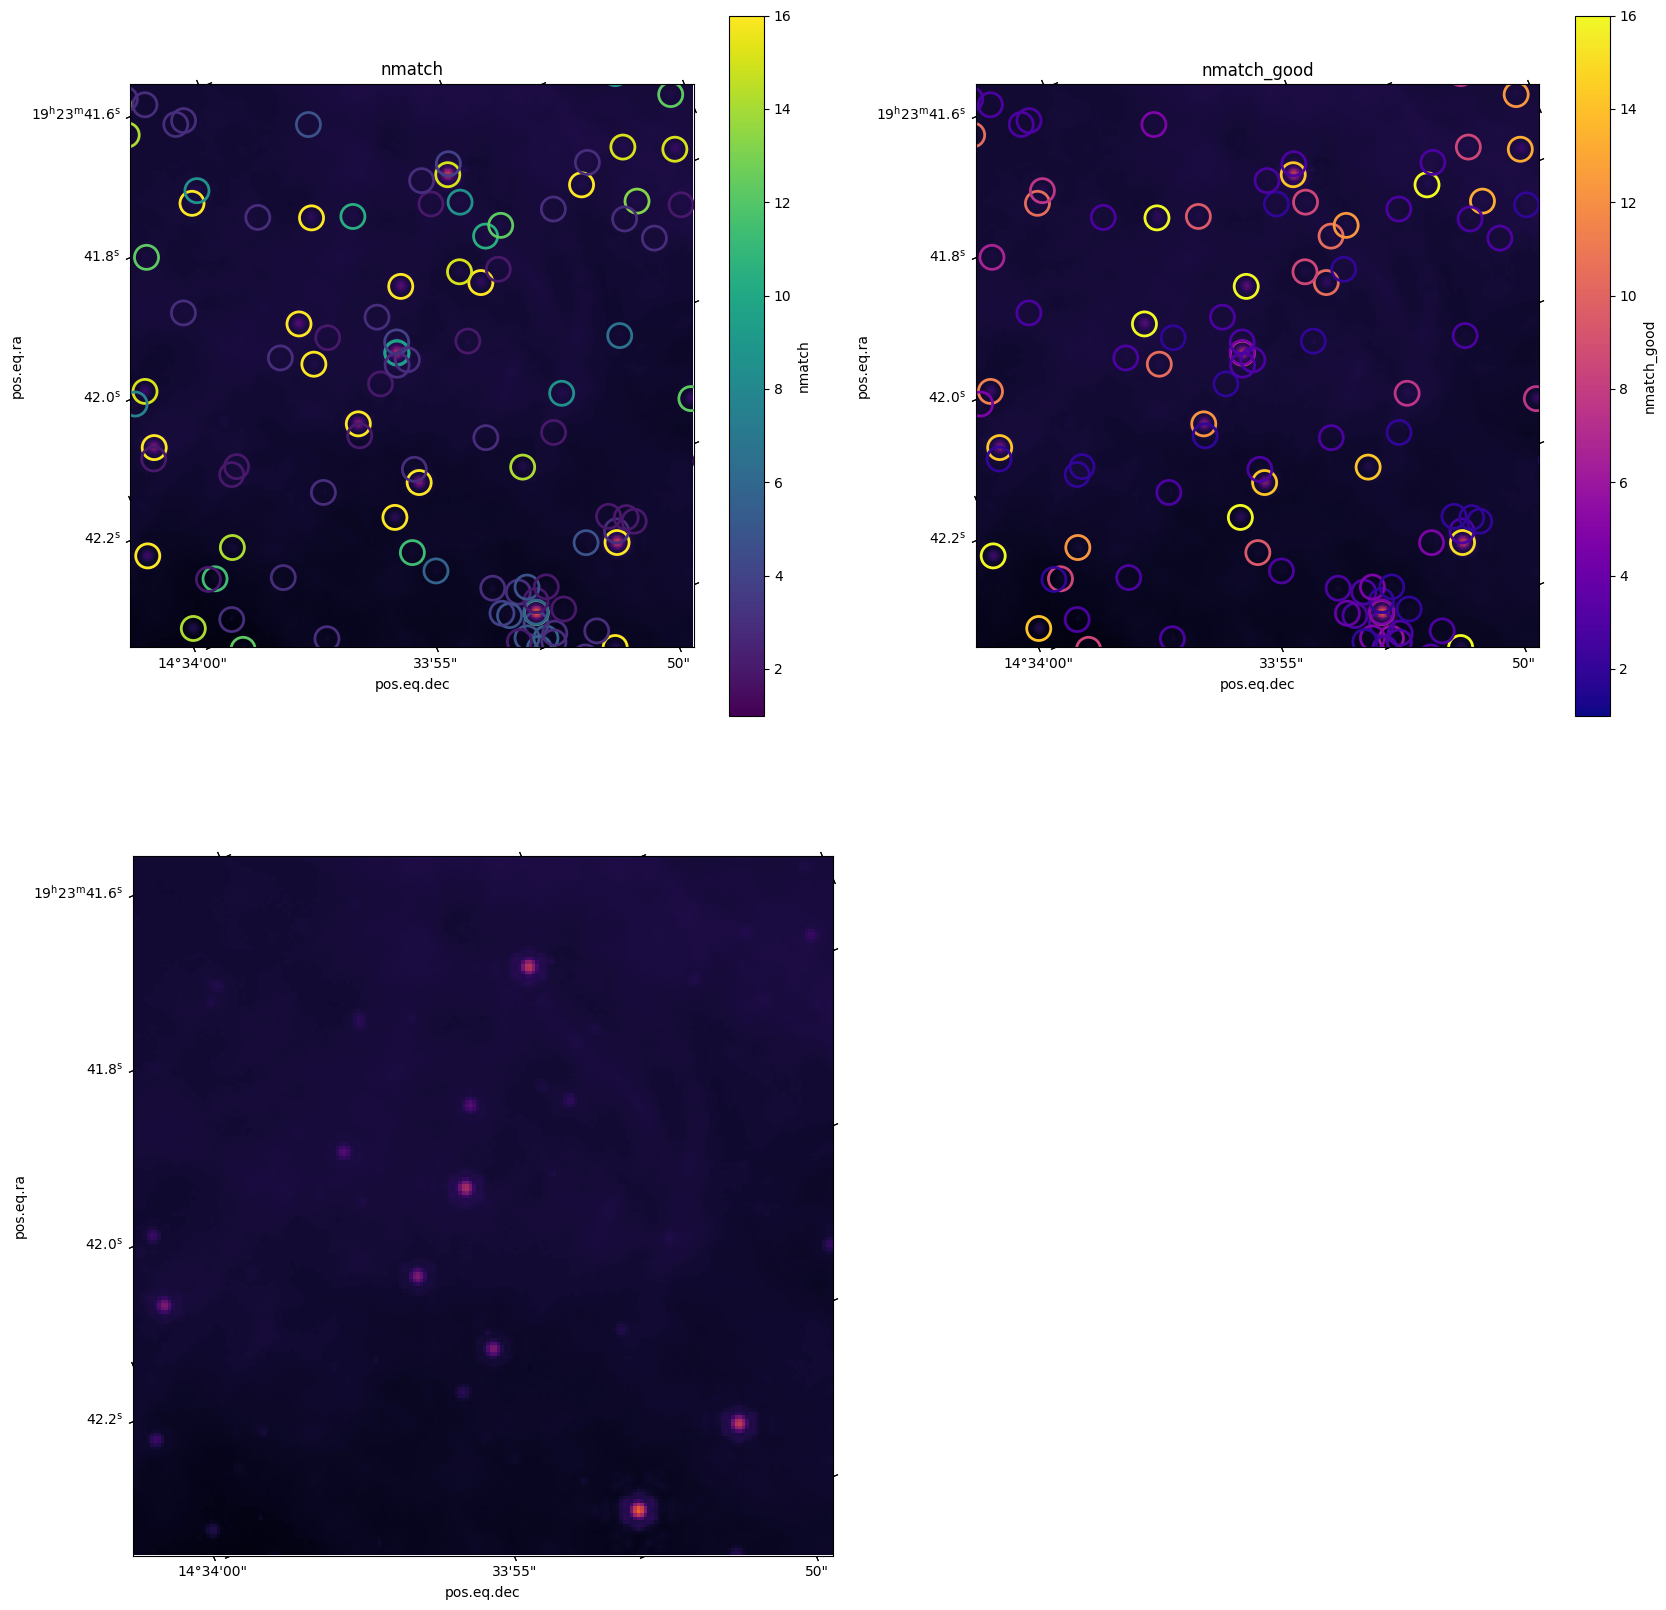

In [41]:
plot_cutouts(1000, 1000, size=200)

### check with by-eye sources 

In [42]:
from regions import Regions
from astropy.coordinates import SkyCoord
import numpy as np
test_regions = Regions.read('/orange/adamginsburg/w51/TaehwaYoo/jwst_w51/f140m_refine_test.reg', format='crtf')
by_eye_sources = Regions.read(f'/orange/adamginsburg/w51/TaehwaYoo/jwst_w51/by_eye_star_{filt.lower()}.reg', format='crtf')
ra_reg = []
dec_reg = []
for reg_ in by_eye_sources:
    ra_reg.append(reg_.center.ra.deg)
    dec_reg.append(reg_.center.dec.deg)
by_eye_skycoord = SkyCoord(ra=ra_reg*u.deg, dec=dec_reg*u.deg, frame='icrs')


In [45]:
def plot_cutout_with_regions(reg, filt, image_filenames):
    hdu = fits.open(image_filenames[filt.lower()])
    img = fits_img['SCI'].data
    hdr = fits_img['SCI'].header
    wcs = WCS(hdu[1].header if len(hdu) > 1 else hdu[0].header)
    print(nrca_table.colnames)
    norm = simple_norm(img, stretch='log', percent=97)
    print(reg.center, reg.width, reg.height)
    cutout = Cutout2D(img, reg.center, (reg.height, reg.width), wcs=wcs)
    fig = plt.figure(figsize=(20,30))
    ax1 = fig.add_subplot(3,2,1,projection=cutout.wcs)
    ax2 = fig.add_subplot(3,2,2,projection=cutout.wcs)
    ax5 = fig.add_subplot(3,2,3,projection=cutout.wcs)
    ax6 = fig.add_subplot(3,2,4,projection=cutout.wcs)
    ax3 = fig.add_subplot(3,2,5)
    ax4 = fig.add_subplot(3,2,6)
   

    ax1.imshow(cutout.data, norm = norm, origin='lower', cmap='inferno')
    ax2.imshow(cutout.data, norm = norm, origin='lower', cmap='inferno')
    ax5.imshow(cutout.data, norm = norm, origin='lower', cmap='inferno')
    ax6.imshow(cutout.data, norm = norm, origin='lower', cmap='inferno')
    skycoords = nrca_table['skycoord']
    xpix, ypix = cutout.wcs.world_to_pixel(skycoords)
    xpix_by_eye, ypix_by_eye = cutout.wcs.world_to_pixel(by_eye_skycoord)

    nmatch = nrca_table['nmatch']
    nmatch_good = nrca_table['nmatch_good']
    import matplotlib.cm as cm
    cmap1 = cm.get_cmap('viridis')
    cmap2 = cm.get_cmap('plasma')
    
    # Remove 'c' parameter, only use edgecolors
    sc1 = ax1.scatter(xpix-cutout.xmin_original, ypix-cutout.ymin_original, s=300, facecolors='none', edgecolors=cmap1(nmatch/nmatch.max()), linewidths=2, label='nmatch')
    sc2 = ax2.scatter(xpix-cutout.xmin_original, ypix-cutout.ymin_original, s=300, facecolors='none', edgecolors=cmap2(nmatch_good/nmatch_good.max()), linewidths=2, label='nmatch_good')
    ax1.scatter(xpix_by_eye - cutout.xmin_original, ypix_by_eye - cutout.ymin_original, s=100, facecolors='none', edgecolors='red', linewidths=1, label='by eye sources')
    ax2.scatter(xpix_by_eye - cutout.xmin_original, ypix_by_eye - cutout.ymin_original, s=100, facecolors='none', edgecolors='red', linewidths=1, label='by eye sources')
    ax1.set_xlim(cutout.xmin_cutout, cutout.xmax_cutout)
    ax1.set_ylim(cutout.ymin_cutout, cutout.ymax_cutout)
    ax2.set_xlim(cutout.xmin_cutout, cutout.xmax_cutout)
    ax2.set_ylim(cutout.ymin_cutout, cutout.ymax_cutout)
    ax1.set_title('nmatch')

    ax2.set_title('nmatch_good')
    # For colorbar, create a ScalarMappable
    import matplotlib as mpl
    sm1 = mpl.cm.ScalarMappable(cmap=cmap1, norm=mpl.colors.Normalize(vmin=nmatch.min(), vmax=nmatch.max()))
    sm2 = mpl.cm.ScalarMappable(cmap=cmap2, norm=mpl.colors.Normalize(vmin=nmatch_good.min(), vmax=nmatch_good.max()))
    plt.colorbar(sm1, ax=ax1, label='nmatch')
    plt.colorbar(sm2, ax=ax2, label='nmatch_good')

    idx, d2d, d3d = by_eye_skycoord.match_to_catalog_sky(skycoords)
    matched = d2d < 0.1*u.arcsec
    matched_skycoord = skycoords[idx[matched]]  
    xpix_matched, ypix_matched = wcs.world_to_pixel(matched_skycoord)
    sc1 = ax5.scatter(xpix_matched-cutout.xmin_original, ypix_matched-cutout.ymin_original, s=300, facecolors='none', edgecolors=cmap1(nmatch/nmatch.max()), linewidths=2, label='nmatch')
    sc2 = ax6.scatter(xpix_matched-cutout.xmin_original, ypix_matched-cutout.ymin_original, s=300, facecolors='none', edgecolors=cmap2(nmatch_good/nmatch_good.max()), linewidths=2, label='nmatch_good')
    ax5.set_xlim(0, size)
    ax5.set_ylim(0, size)
    ax6.set_xlim(0, size)
    ax6.set_ylim(0, size)
    hist_bins = np.arange(16)
    contains = reg.contains(skycoords, cutout.wcs)
    ax3.hist(nrca_table['nmatch'][contains], bins=hist_bins, color='blue', alpha=0.7)
    ax3.hist(nrca_table['nmatch'][idx[matched]], bins=hist_bins, color='orange', alpha=0.7)
    ax3.set_xlabel('nmatch')
    ax3.set_ylabel('Number of sources')
    ax4.hist(nrca_table['nmatch_good'][contains], bins=hist_bins, color='blue', alpha=0.7)
    ax4.hist(nrca_table['nmatch_good'][idx[matched]], bins=hist_bins, color='orange', alpha=0.7)
    ax4.set_xlabel('nmatch_good')
    ax4.set_ylabel('Number of sources')







    

    

Set DATE-AVG to '2025-05-06T16:59:22.421' from MJD-AVG.
Set DATE-END to '2025-05-06T17:21:22.408' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -25.271881 from OBSGEO-[XYZ].
Set OBSGEO-H to 1611441536.798 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


['flux_fit', 'flux_err', 'skycoord', 'qfit', 'cfit', 'local_bkg', 'roundness1', 'roundness2', 'sharpness', 'std_ra', 'std_dec', 'nmatch', 'nmatch_good', 'flux_err_prop']
<SkyCoord (ICRS): (ra, dec) in deg
    (290.91726747, 14.51855871)> 6.23 arcsec 6.23 arcsec


/scratch/local/23155831/ipykernel_1305404/3583736440.py:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap1 = cm.get_cmap('viridis')
/scratch/local/23155831/ipykernel_1305404/3583736440.py:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap2 = cm.get_cmap('plasma')
Set DATE-AVG to '2025-05-06T16:59:22.421' from MJD-AVG.
Set DATE-END to '2025-05-06T17:21:22.408' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -25.271881 from OBSGEO-[XYZ].
Set OBSGEO-H to 1611441536.798 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


['flux_fit', 'flux_err', 'skycoord', 'qfit', 'cfit', 'local_bkg', 'roundness1', 'roundness2', 'sharpness', 'std_ra', 'std_dec', 'nmatch', 'nmatch_good', 'flux_err_prop']
<SkyCoord (ICRS): (ra, dec) in deg
    (290.92310852, 14.53554522)> 22.0 arcsec 22.0 arcsec


/scratch/local/23155831/ipykernel_1305404/3583736440.py:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap1 = cm.get_cmap('viridis')
/scratch/local/23155831/ipykernel_1305404/3583736440.py:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap2 = cm.get_cmap('plasma')
Set DATE-AVG to '2025-05-06T16:59:22.421' from MJD-AVG.
Set DATE-END to '2025-05-06T17:21:22.408' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -25.271881 from OBSGEO-[XYZ].
Set OBSGEO-H to 1611441536.798 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


['flux_fit', 'flux_err', 'skycoord', 'qfit', 'cfit', 'local_bkg', 'roundness1', 'roundness2', 'sharpness', 'std_ra', 'std_dec', 'nmatch', 'nmatch_good', 'flux_err_prop']
<SkyCoord (ICRS): (ra, dec) in deg
    (290.9087151, 14.55625621)> 20.0 arcsec 20.0 arcsec


/scratch/local/23155831/ipykernel_1305404/3583736440.py:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap1 = cm.get_cmap('viridis')
/scratch/local/23155831/ipykernel_1305404/3583736440.py:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap2 = cm.get_cmap('plasma')
Set DATE-AVG to '2025-05-06T16:59:22.421' from MJD-AVG.
Set DATE-END to '2025-05-06T17:21:22.408' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -25.271881 from OBSGEO-[XYZ].
Set OBSGEO-H to 1611441536.798 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


['flux_fit', 'flux_err', 'skycoord', 'qfit', 'cfit', 'local_bkg', 'roundness1', 'roundness2', 'sharpness', 'std_ra', 'std_dec', 'nmatch', 'nmatch_good', 'flux_err_prop']
<SkyCoord (ICRS): (ra, dec) in deg
    (290.90137103, 14.52426693)> 20.0 arcsec 20.0 arcsec


/scratch/local/23155831/ipykernel_1305404/3583736440.py:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap1 = cm.get_cmap('viridis')
/scratch/local/23155831/ipykernel_1305404/3583736440.py:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap2 = cm.get_cmap('plasma')


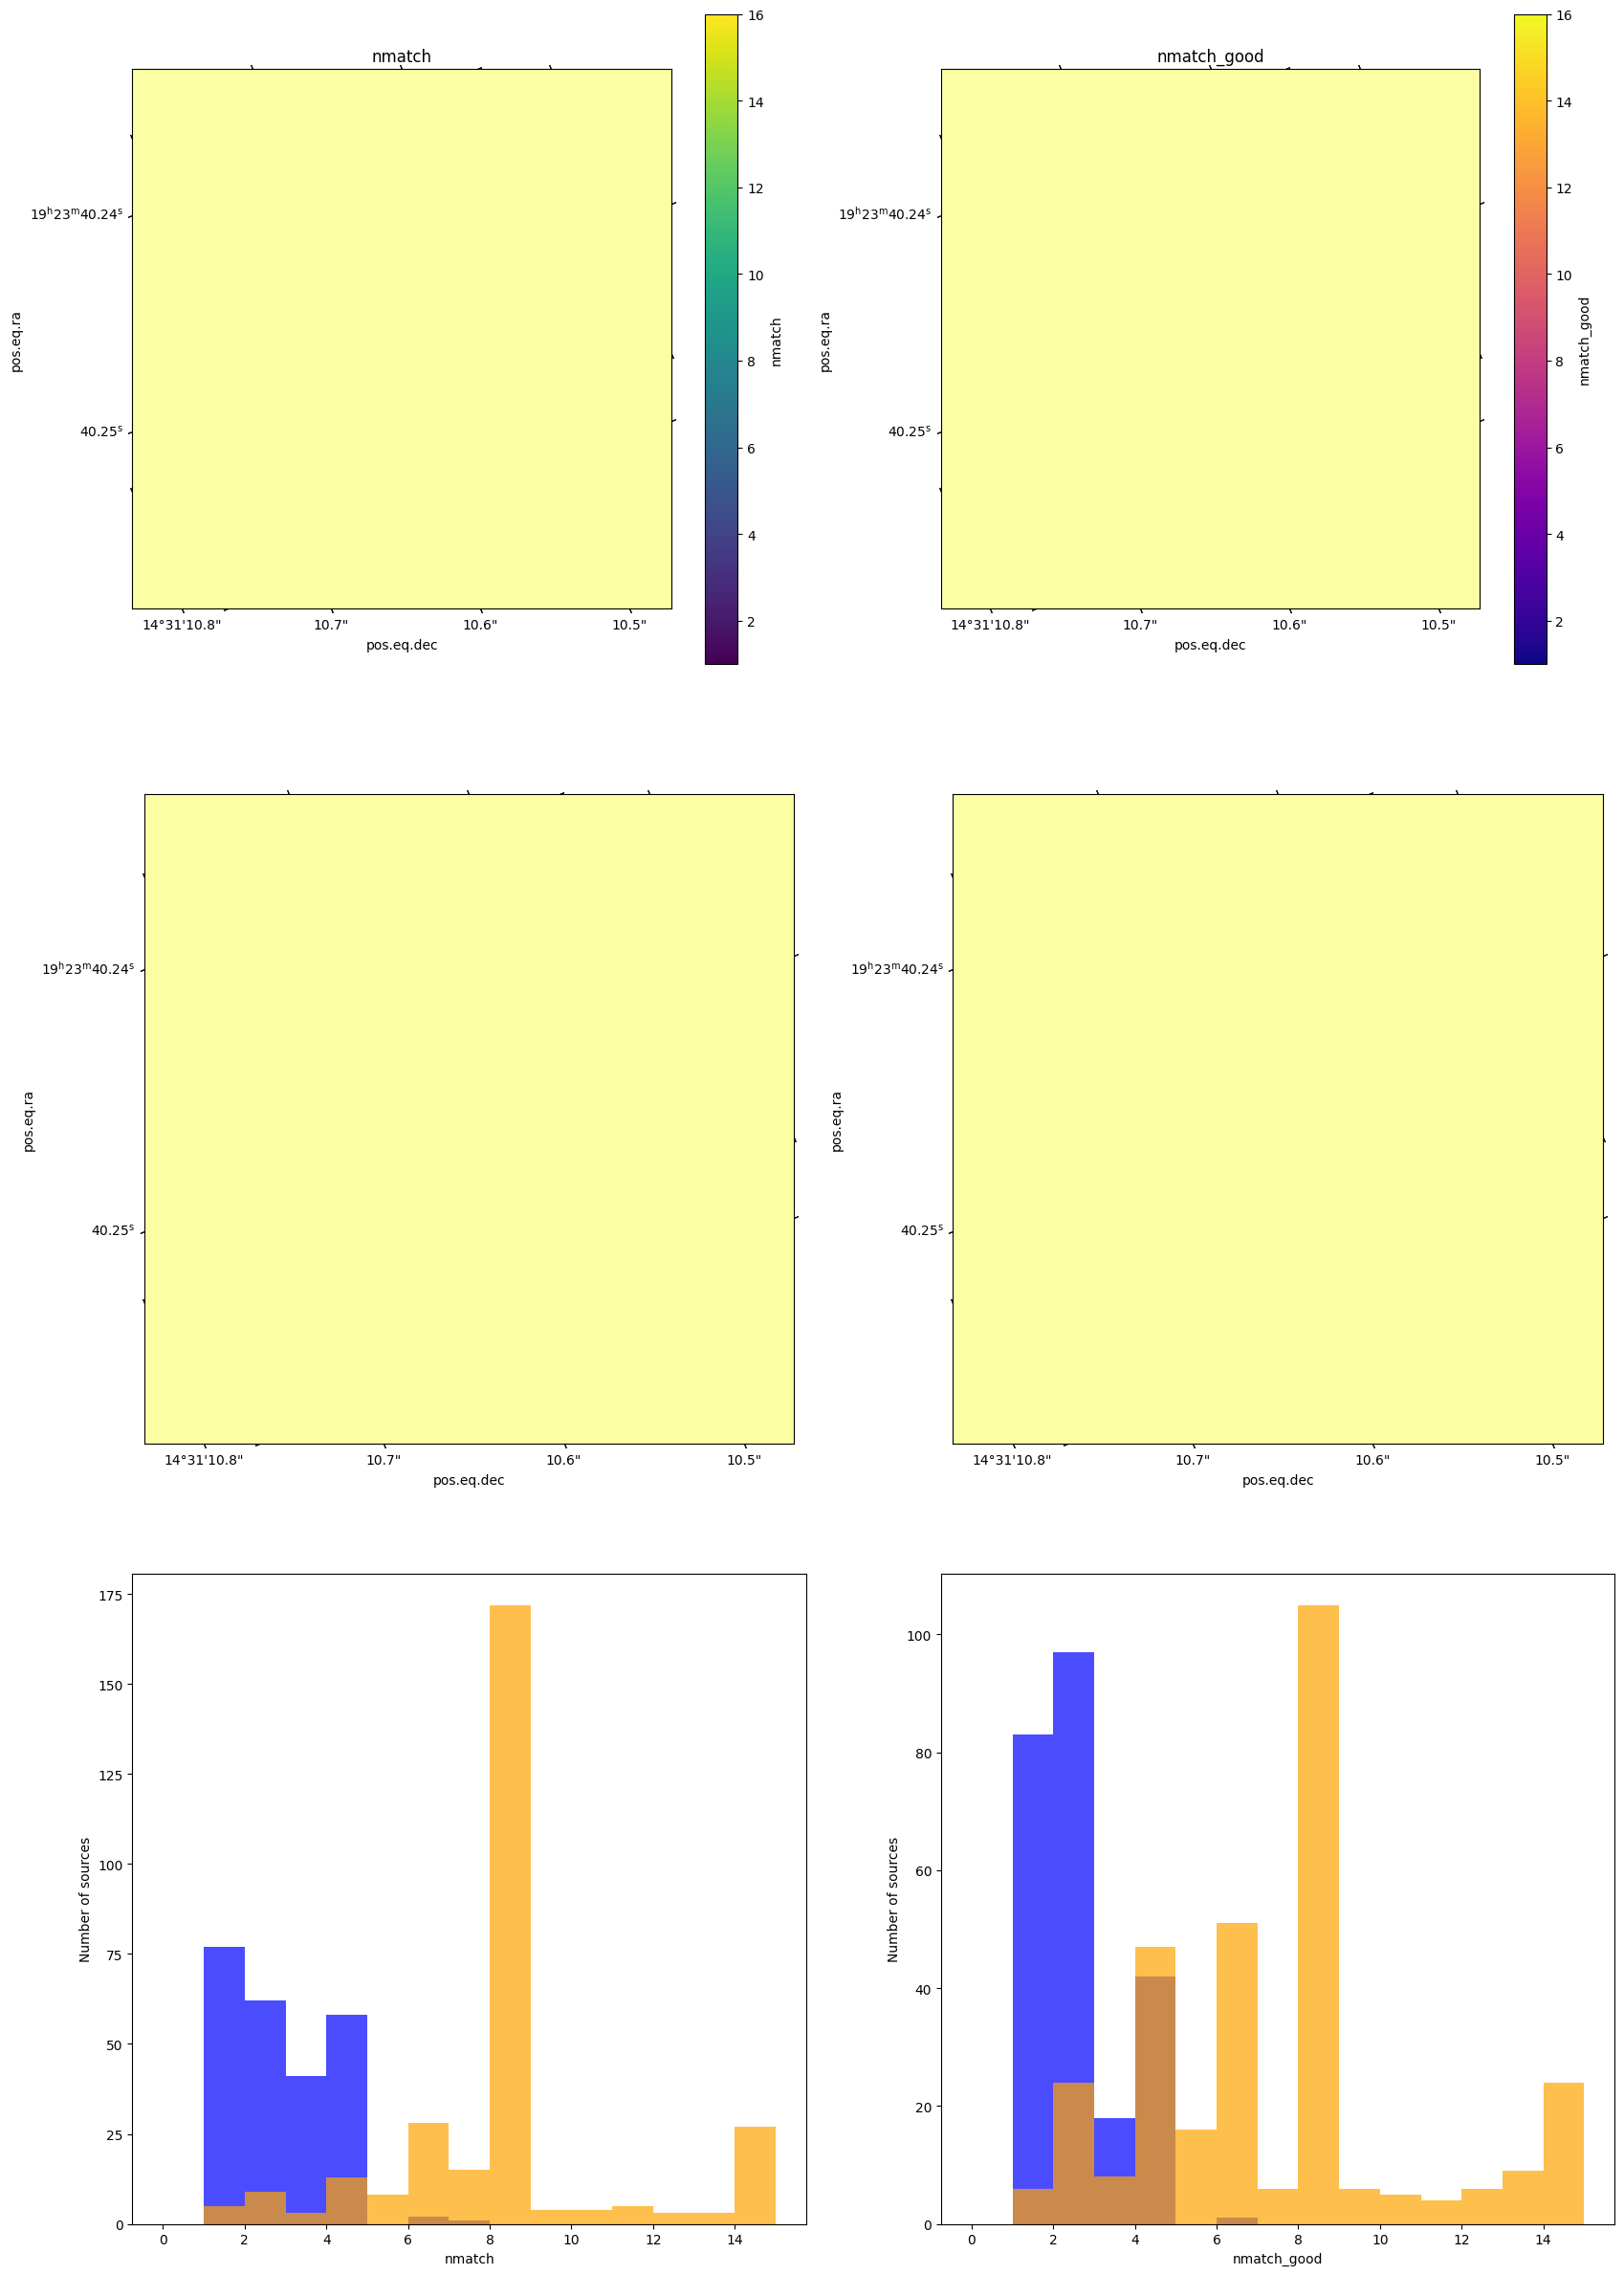

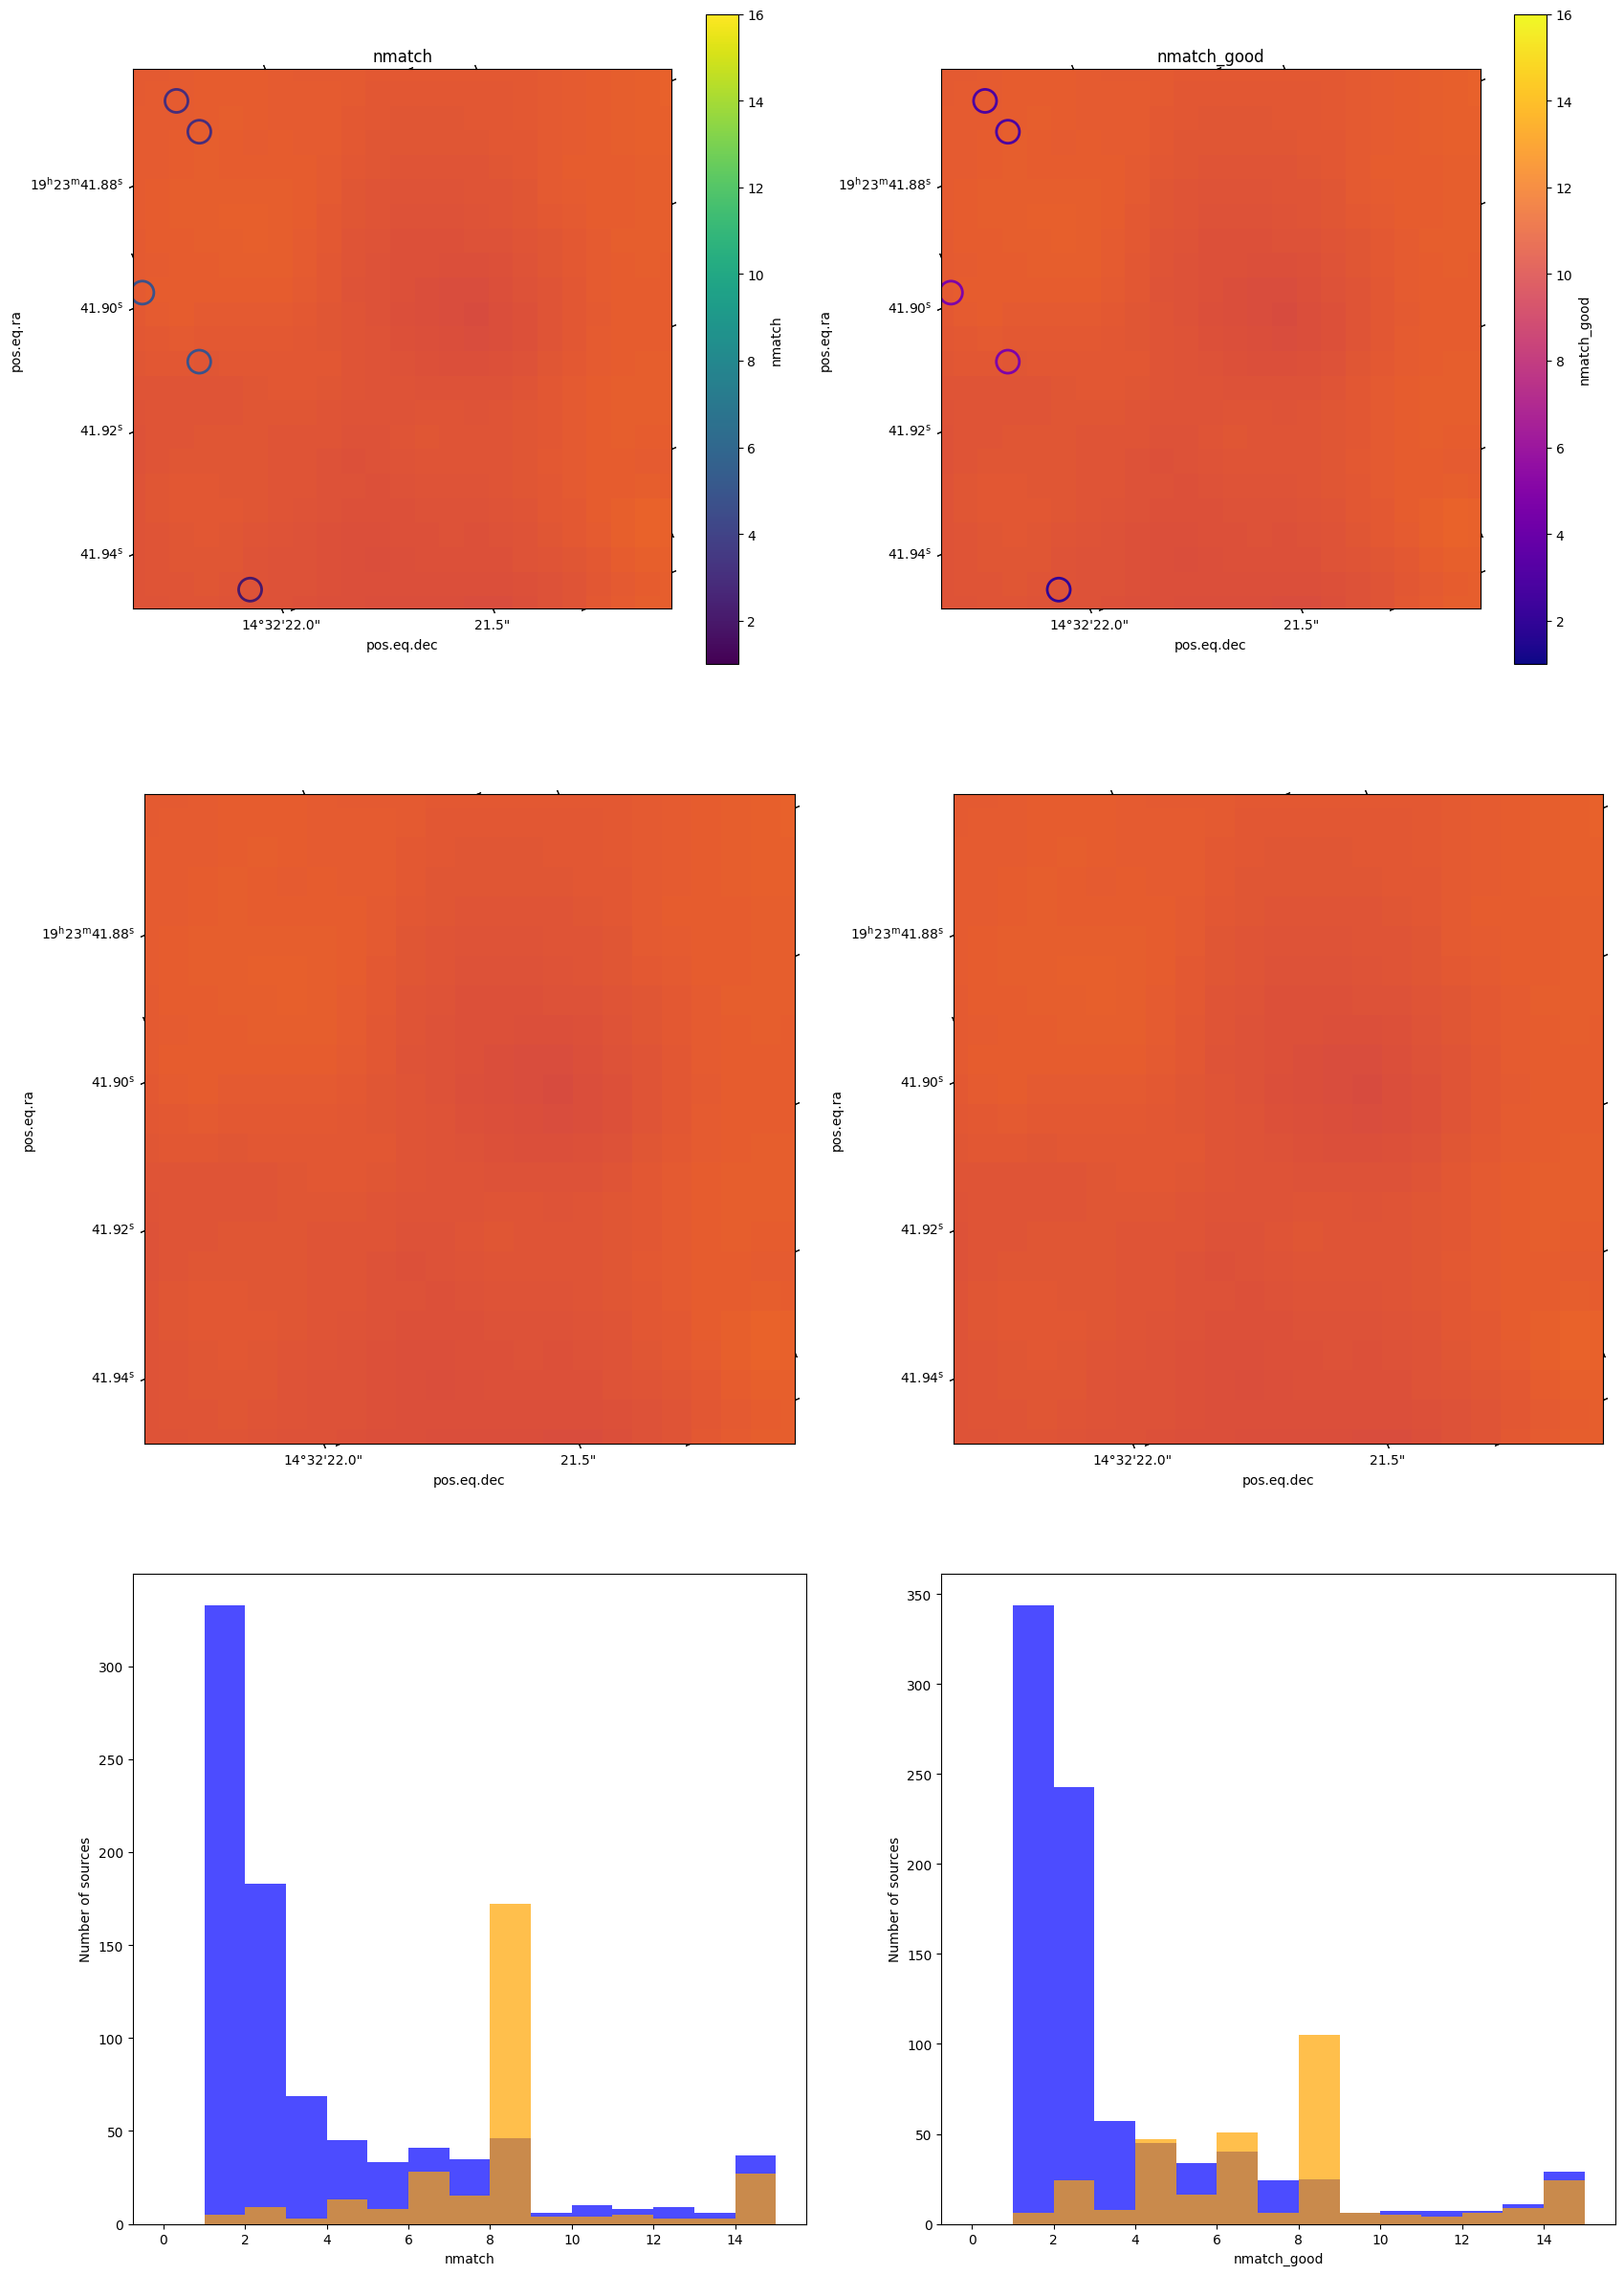

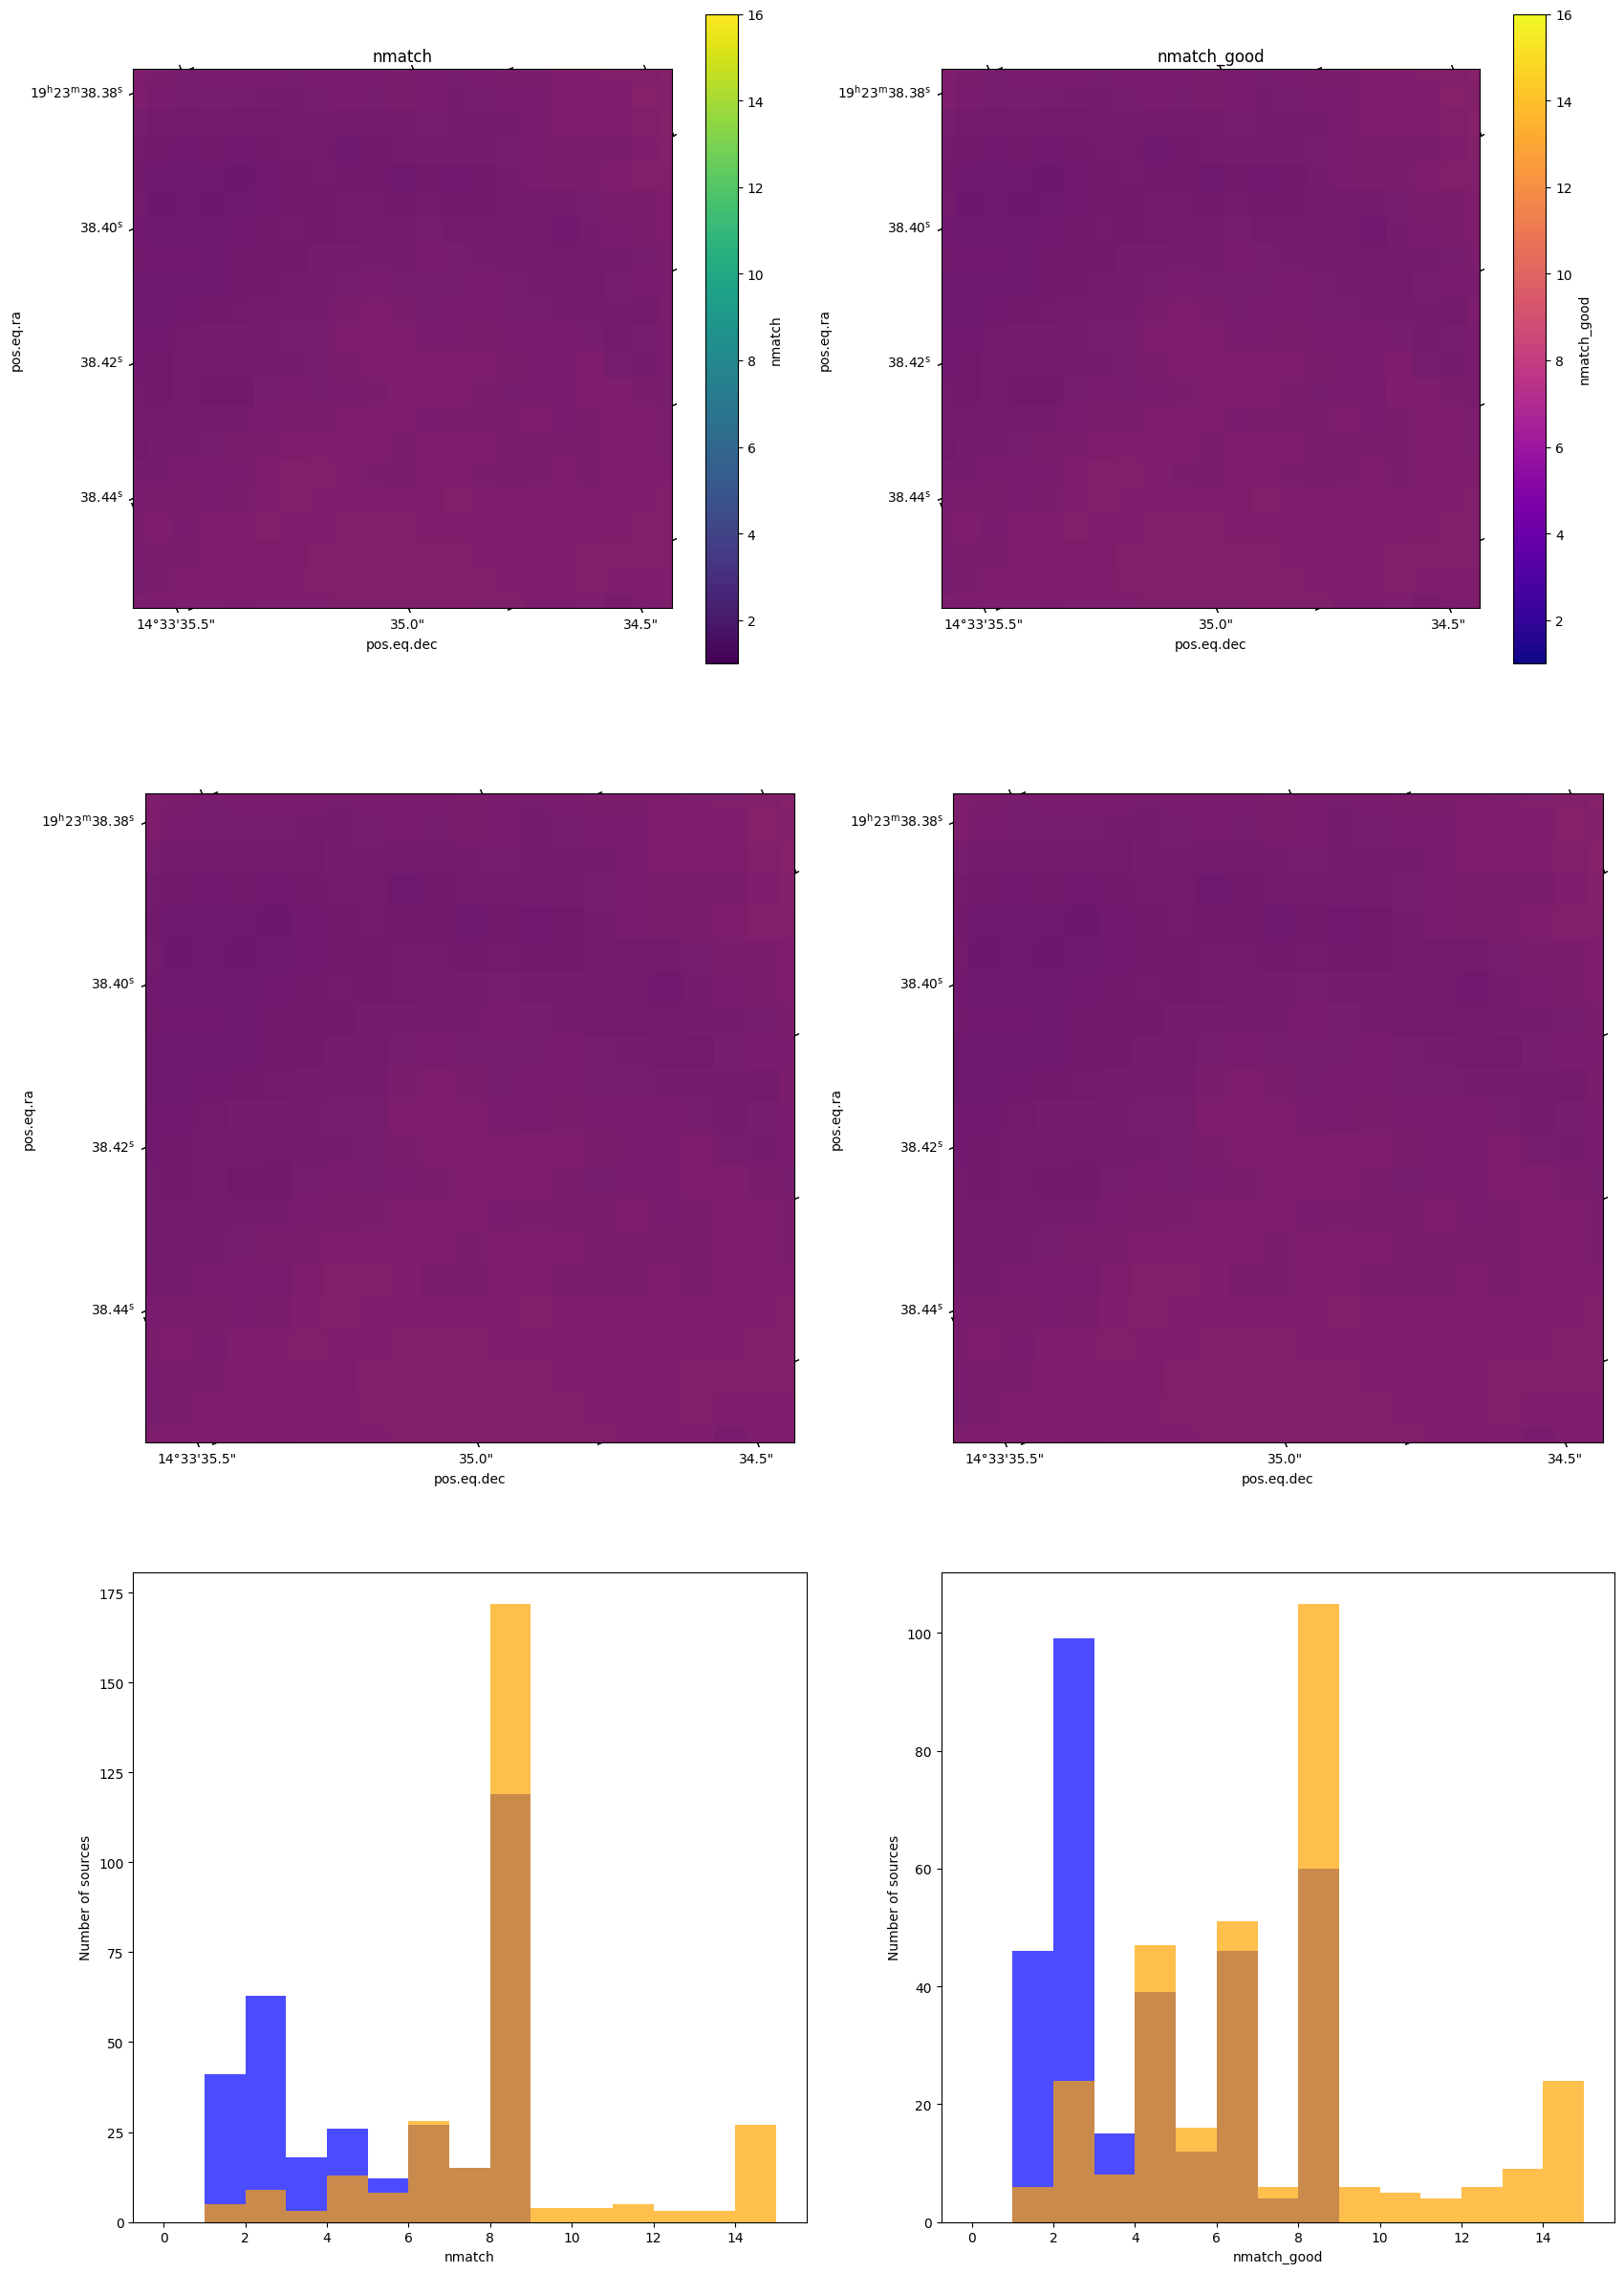

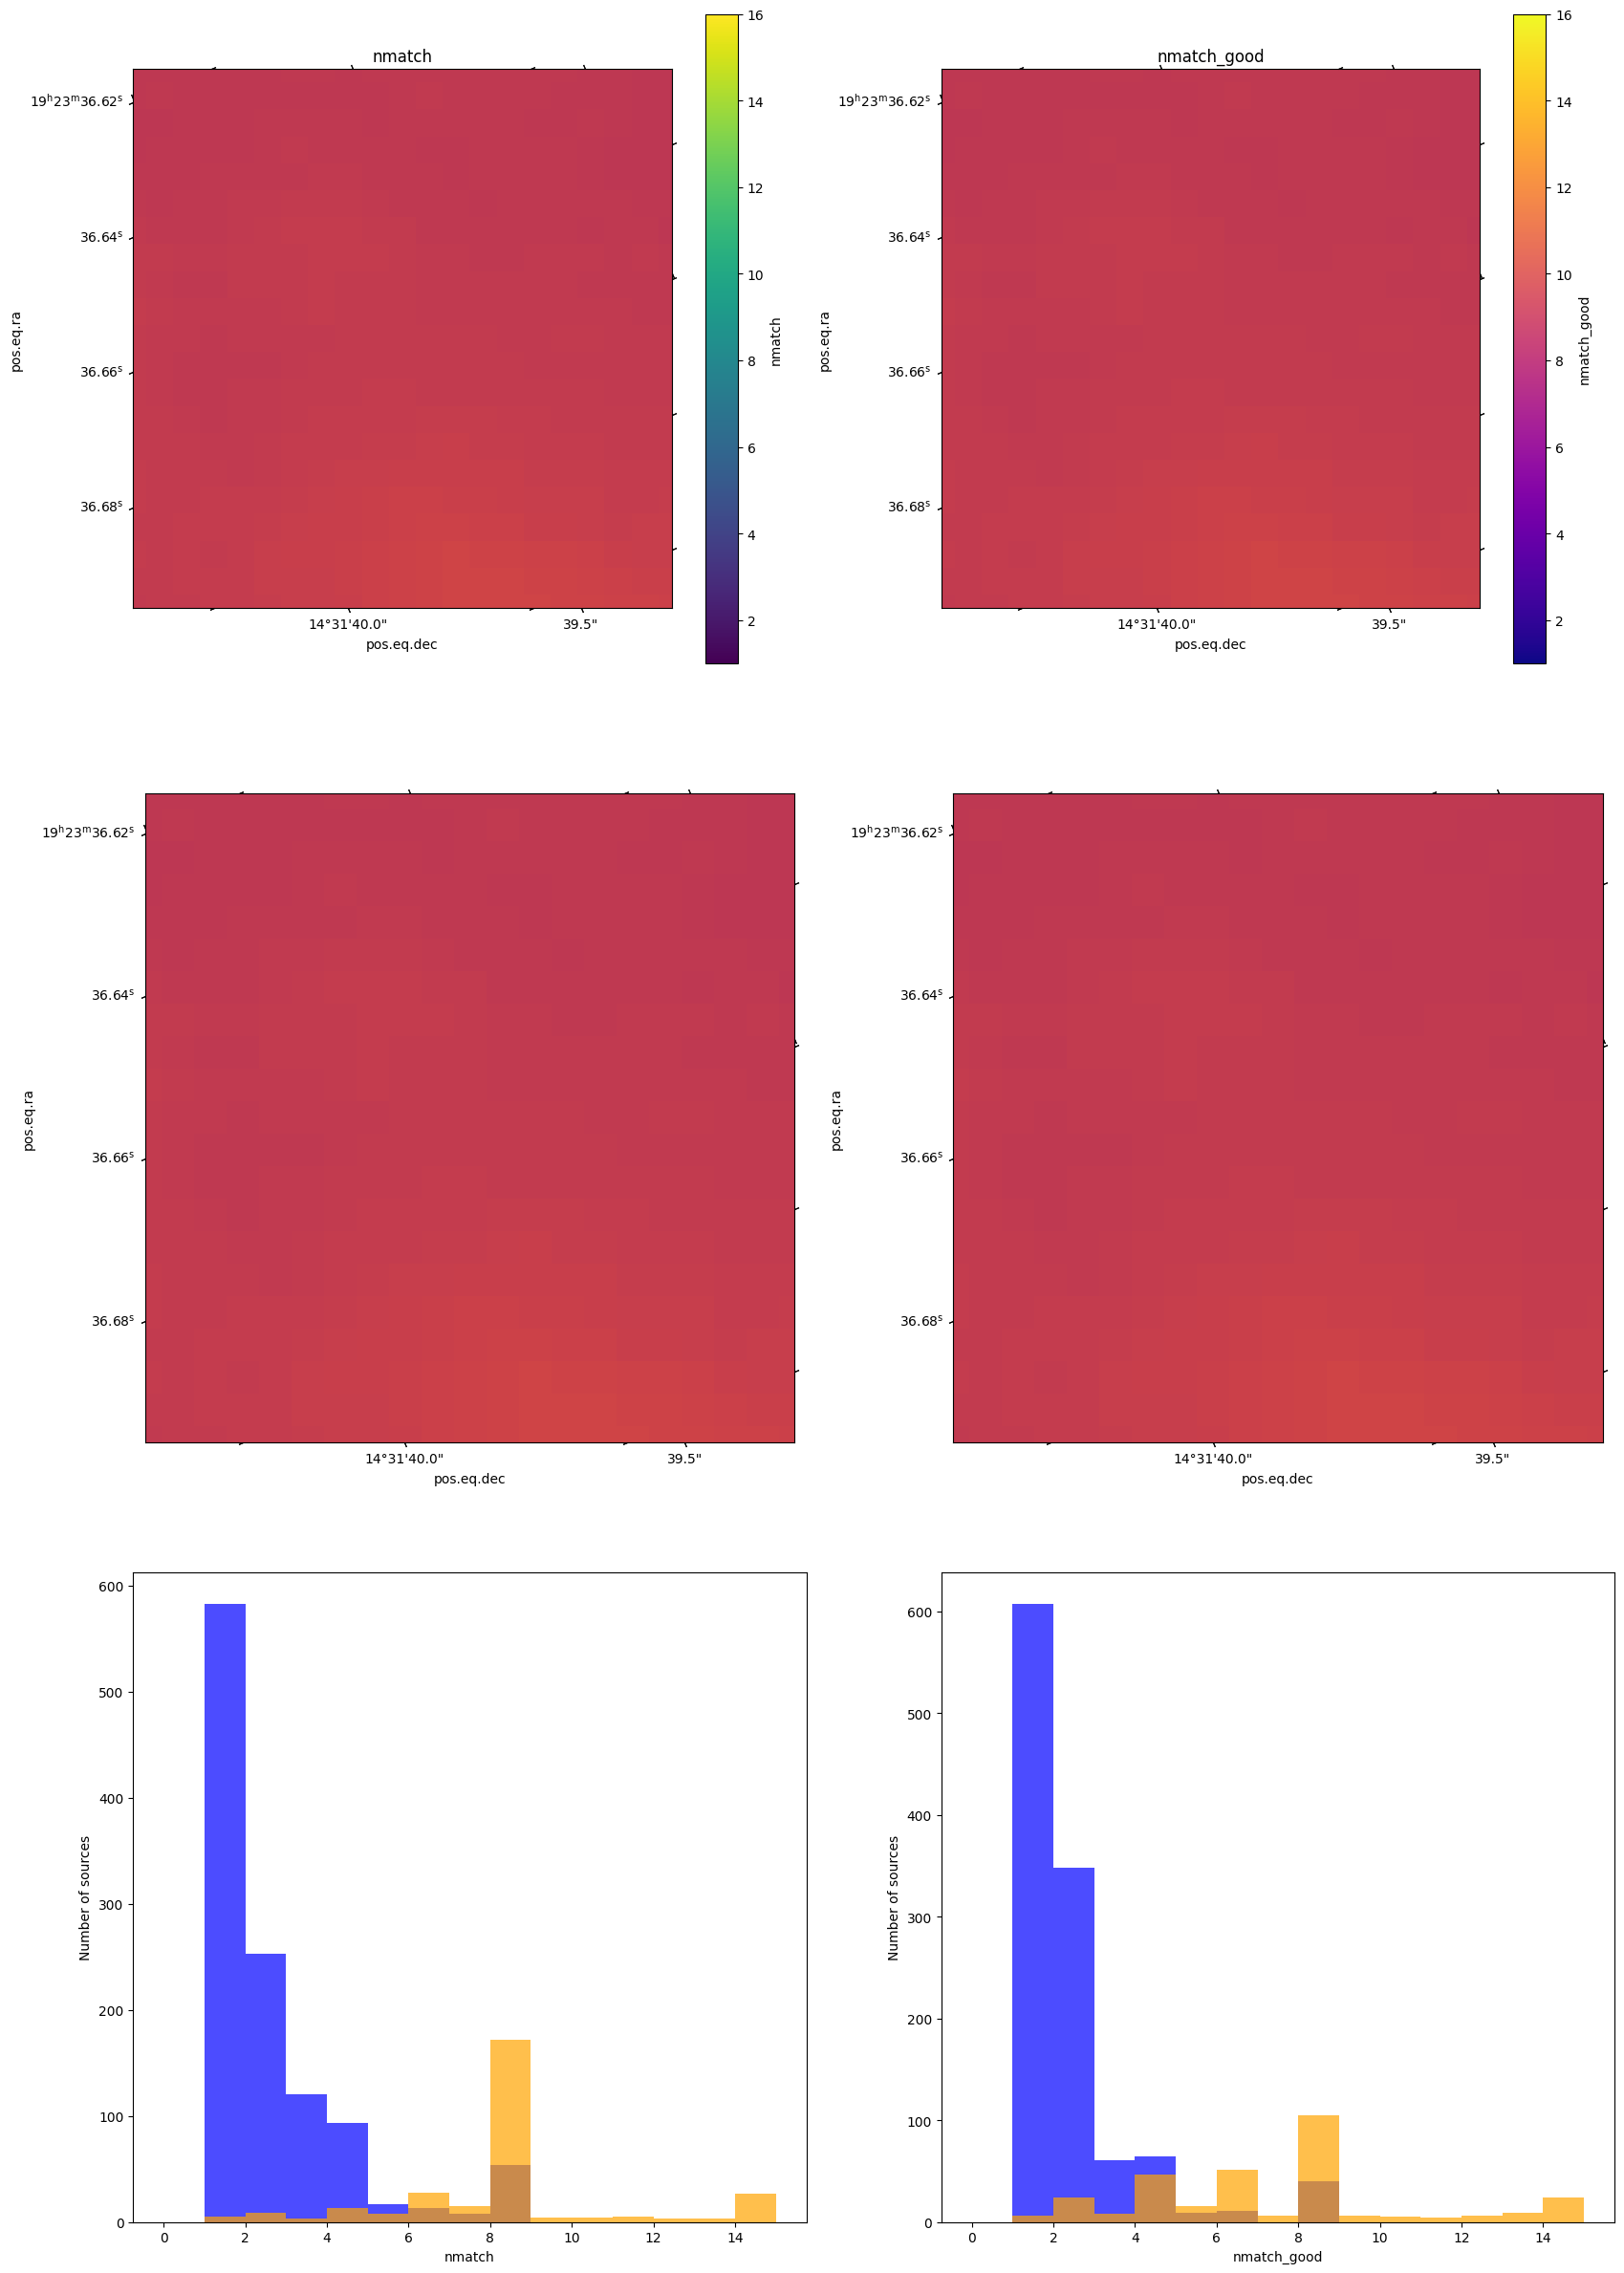

In [44]:
for reg_ in test_regions:
    plot_cutout_with_regions(reg_, filt,image_filenames)